# simple linear regression

formula slr: y=mx+c

y is dv | x is iv | m is pos slope | c is intercept or constant | in this case constant is 3 not 0


prediction line =linear regression and difference between ( actual - predict = residuals or errors )

mse = 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r"C:\Users\shaba\OneDrive\csv_xml_sheets\Salary_Data.csv")
data.head() #30 row ,2 col

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


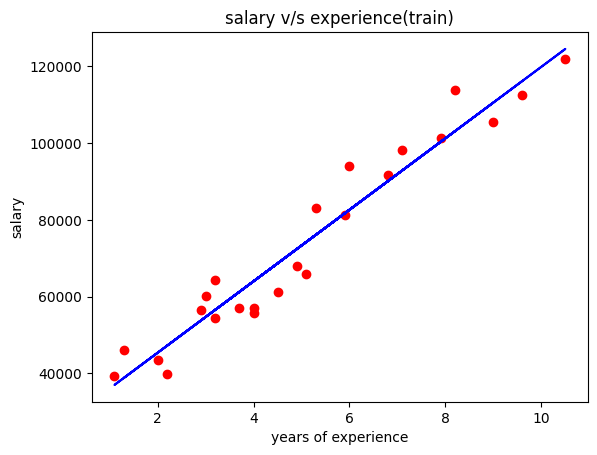

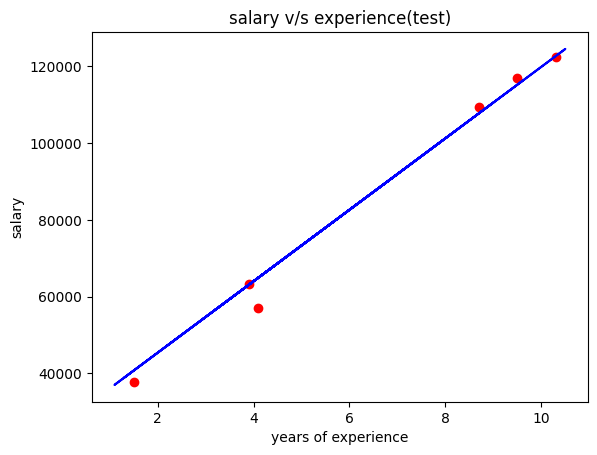

slope = [9312.57512673]
intercept = 26780.09915062818
12 yrs exp person salary = 138524


In [ ]:
# split the data into x and y
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

# here we do not have any missing value direct split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#we created 4 var for x and y and split data into 80 for train and 20 for test

#buld slr alogrithm,when we bulid slr model internally system call maths formula to process the data
#LinearRegression fits a linear model with coefficients w=(w1,..wp)to minimize the error,
#when we reduce the error we get best fit line.
from sklearn.linear_model import LinearRegression

#create obj regressor (can give any name),regressor is a model used to predict continuous target variables.
#linearregression is algo which we import from sklearn package or framework
regressor=LinearRegression()
regressor.fit(x_train,y_train)

# check whether model is accurate or not
y_pred=regressor.predict(x_test)

# vis to check best fit line
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('salary v/s experience(train)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

# vis to check best fit line
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('salary v/s experience(test)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

#bcz data has less error in test part so can say model is best fit line

m_slope=regressor.coef_
print('slope =',m_slope)

c_inter=regressor.intercept_
print('intercept =',c_inter)
#intercept means in that org min salary depends on constant value.

# to know the persons salary accoring to expr
#year of exp=slope value *12 + intercept value
#y_12=m_slope *12 + c_inter
y_12=9312*12+26780
print('12 yrs exp person salary =',y_12)

# Predict salary for 15 and 20 years of experience using the trained model
y_15 = regressor.predict([[12]])
y_20 = regressor.predict([[20]])
print(f"Predicted salary for 12 years of experience: ${y_12[0]:,.2f}")
print(f"Predicted salary for 20 years of experience: ${y_20[0]:,.2f}")

"""
# Bias:

bias = regressor.score(X_train, y_train)
This calculates the R² score (coefficient of determination) of the model on the training data (X_train, y_train). 
A higher score indicates that the model fits the training data well, suggesting lower bias.

# Variance:

variance = regressor.score(X_test, y_test)
This calculates the R² score of the model on the test data (X_test, y_test). 
A higher score here indicates that the model generalizes well to new, unseen data, suggesting lower variance.

# Training Mean Squared Error (MSE):

train_mse = mean_squared_error(y_train, regressor.predict(X_train))
This calculates the MSE on the training data. It measures the average squared difference between the actual 
and predicted values in the training set. Lower values indicate better fit on the training data.

# Test Mean Squared Error (MSE):

test_mse = mean_squared_error(y_test, y_pred)
This calculates the MSE on the test data. It measures the average squared difference between
the actual and predicted values in the test set. Lower values indicate better generalization to new data."""

# Check model performance
bias = regressor.score(X_train, y_train)
variance = regressor.score(X_test, y_test)
train_mse = mean_squared_error(y_train, regressor.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print(f"Training Score (R^2): {bias:.2f}")
print(f"Testing Score (R^2): {variance:.2f}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Save the trained model to disk
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)
print("Model has been pickled and saved as linear_regression_model.pkl")

import os
print(os.getcwd())